In [28]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

RANDOM_SEED = 42

# Specify each path

In [29]:
#dataset = 'model/keypoint_classifier/keypoint.csv'
dataset = pd.read_csv('hand_landmarks_data.csv', header=None)
y_dataset = dataset.iloc[:, 0]
X_dataset = dataset.iloc[:, 1:]


model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_dataset_encoded = encoder.fit_transform(y_dataset)


In [31]:

X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset_encoded, test_size=0.25, random_state=42
)


# Set number of classes

In [32]:
NUM_CLASSES = 26

# Dataset reading

In [33]:
#X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [34]:
#y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [36]:
#model = tf.keras.models.Sequential([
    #tf.keras.layers.Input((21 * 2, )),
  #  tf.keras.layers.BatchNormalization(),
   # tf.keras.layers.Dense(128, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #  tf.keras.layers.Dropout(0.5),
   # tf.keras.layers.Dense(64, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
   # tf.keras.layers.Dropout(0.5),
  #  tf.keras.layers.Dense(32, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
   # tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
#])


In [37]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input((42,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 letters: A, B, C
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 42)             │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,523 (205.17 KB)

 Trainable params: 52,439 (204.84 KB)

 Non-trainable params: 84 (336.00 B)

In [38]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/100
30/30 - 1s - 31ms/step - accuracy: 0.7342 - loss: 0.7004 - val_accuracy: 0.7000 - val_loss: 0.8713
Epoch 2/100
30/30 - 0s - 3ms/step - accuracy: 0.8565 - loss: 0.3865 - val_accuracy: 0.7000 - val_loss: 0.7454
Epoch 3/100
30/30 - 0s - 3ms/step - accuracy: 0.8861 - loss: 0.3316 - val_accuracy: 0.7125 - val_loss: 0.6707
Epoch 4/100
30/30 - 0s - 3ms/step - accuracy: 0.9114 - loss: 0.2725 - val_accuracy: 0.8875 - val_loss: 0.5501
Epoch 5/100
30/30 - 0s - 3ms/step - accuracy: 0.9367 - loss: 0.1915 - val_accuracy: 0.8000 - val_loss: 0.4827
Epoch 6/100
30/30 - 0s - 3ms/step - accuracy: 0.9409 - loss: 0.1878 - val_accuracy: 0.9875 - val_loss: 0.2951
Epoch 7/100
30/30 - 0s - 3ms/step - accuracy: 0.9578 - loss: 0.1328 - val_accuracy: 1.0000 - val_loss: 0.2166
Epoch 8/100
30/30 - 0s - 3ms/step - accuracy: 0.9578 - loss: 0.1377 - val_accuracy: 1.0000 - val_loss: 0.1510
Epoch 9/100
30/30 - 0s - 3ms/step - accuracy: 0.9578 - loss: 0.0975 - val_accuracy: 1.0000 - val_loss: 0.0840
Epoch 10/

In [39]:
#model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

In [40]:
# Model checkpoint callback
#cp_callback = tf.keras.callbacks.ModelCheckpoint(
    #model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
#es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [41]:
# Model compilation
#model.compile(
    #optimizer='Adam',
    #loss='sparse_categorical_crossentropy',
   # metrics=['accuracy']
#)

In [42]:
model.save('new_hand_model.h5')


# Model training

In [43]:
#model.fit(
   # X_train,
   # y_train,
    #epochs=1000,
   # batch_size=128,
    #validation_data=(X_test, y_test),
   # callbacks=[cp_callback, es_callback]
#)

In [44]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9898 - loss: 0.0120      
Validation Accuracy: 98.75%


In [45]:
# Loading the saved model
#model = tf.keras.models.load_model(model_save_path)

In [46]:
# Inference test
#predict_result = model.predict(np.array([X_test[0]]))

#print(np.squeeze(predict_result))
#print(np.argmax(np.squeeze(predict_result)))

# Confusion matrix

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


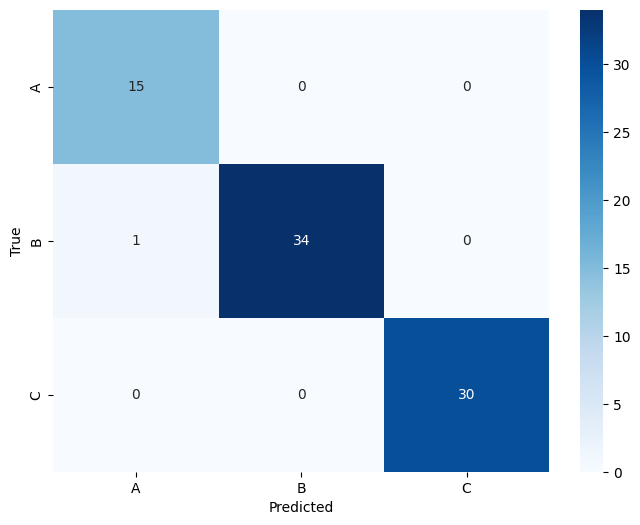

In [47]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Predict on test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, encoder.classes_)


# Convert to model for Tensorflow-Lite

In [48]:
# Save as a model dedicated to inference
#model.save('keypoint_classifier.h5')

model.save('new_hand_model.h5')


In [ ]:
# Transform model (quantization)

#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
#tflite_quantized_model = converter.convert()

#open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/mt/fnjyynpn63q16jqrl370vb8w0000gn/T/tmpiqrw74qk/assets


INFO:tensorflow:Assets written to: /var/folders/mt/fnjyynpn63q16jqrl370vb8w0000gn/T/tmpiqrw74qk/assets


Saved artifact at '/var/folders/mt/fnjyynpn63q16jqrl370vb8w0000gn/T/tmpiqrw74qk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  14277507376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14277508608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14277551728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14277553488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14293933920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14293931456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14289098880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14289097472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14288951072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14288952832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14293639760: Tens

W0000 00:00:1745819425.551995   38361 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745819425.552198   38361 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1745819425.560122   38361 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


62528

# Inference test

In [ ]:
#interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
#interpreter.allocate_tensors()

/Users/mariamjamil/Library/Python/3.9/lib/python/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
# Get I / O tensor
#input_details = interpreter.get_input_details()
#output_details = interpreter.get_output_details()

In [ ]:
#interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

KeyError: 0

In [ ]:
#%%time
# Inference implementation
#interpreter.invoke()
#tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 470 µs, sys: 923 µs, total: 1.39 ms
Wall time: 868 µs


In [ ]:
#print(np.squeeze(tflite_results))
#print(np.argmax(np.squeeze(tflite_results)))

[2.8241775e-04 3.6701895e-11 4.3712770e-08 1.7518575e-07 1.0869401e-07
 5.6491086e-07 7.3864851e-07 1.3587170e-12 6.9029594e-04 3.0718316e-04
 1.4956798e-06 4.9681853e-06 2.4027977e-05 2.5026598e-08 3.3755168e-06
 1.4071456e-09 1.3491152e-07 4.6256287e-11 5.9412017e-08 4.0359737e-05
 3.3075115e-10 1.3051312e-08 2.1617660e-07 1.2159130e-06 9.9864262e-01
 1.1613613e-08]
24
